In [4]:
# Q3_GradientBoosting.ipynb

import numpy as np
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error
)

import matplotlib.pyplot as plt

# 1) Load pre-split data and preprocessing pipeline

X_train = joblib.load("X_train.pkl")
X_test  = joblib.load("X_test.pkl")
y_train = joblib.load("y_train.pkl")
y_test  = joblib.load("y_test.pkl")

preprocess = joblib.load("preprocess_pipeline.pkl")

# 2) Gradient Boosting model

gbm_model = Pipeline([
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gbm_model.fit(X_train, y_train)

# Sample predictions
y_pred_gbm_test = gbm_model.predict(X_test)

print("First 10 GBM predictions:", y_pred_gbm_test[:10])
print("First 10 actuals:        ", y_test[:10].values)


# 3) Train / Test metrics

y_pred_gbm_train = gbm_model.predict(X_train)
y_pred_gbm_test  = gbm_model.predict(X_test)

rmse_gbm_train = np.sqrt(mean_squared_error(y_train, y_pred_gbm_train))
mae_gbm_train  = mean_absolute_error(y_train, y_pred_gbm_train)

rmse_gbm_test = np.sqrt(mean_squared_error(y_test, y_pred_gbm_test))
mae_gbm_test  = mean_absolute_error(y_test, y_pred_gbm_test)

print("GBM Train RMSE:", rmse_gbm_train)
print("GBM Train MAE :", mae_gbm_train)
print("GBM Test RMSE :", rmse_gbm_test)
print("GBM Test MAE  :", mae_gbm_test)

metrics_gbm = {
    "Model": "Gradient Boosting (GBM)",
    "RMSE_train": rmse_gbm_train,
    "RMSE_test": rmse_gbm_test,
    "MAE_train": mae_gbm_train,
    "MAE_test": mae_gbm_test
}

metrics_gbm


First 10 GBM predictions: [-2.57676542e-02  1.04329016e+00  1.72907199e+00  5.90177195e-03
  1.34448527e+00  1.30226483e-02  1.88079810e-02  3.20101670e+00
  7.48463997e+00  2.44349488e+00]
First 10 actuals:         [0 1 1 0 1 0 0 4 8 4]
GBM Train RMSE: 0.7225667826825208
GBM Train MAE : 0.41661169661246866
GBM Test RMSE : 0.7414125409901167
GBM Test MAE  : 0.42507704065569946


{'Model': 'Gradient Boosting (GBM)',
 'RMSE_train': np.float64(0.7225667826825208),
 'RMSE_test': np.float64(0.7414125409901167),
 'MAE_train': 0.41661169661246866,
 'MAE_test': 0.42507704065569946}

In [2]:
# 4) Feature names after preprocessing
preprocessor = gbm_model.named_steps["preprocess"]
feature_names = preprocessor.get_feature_names_out()

print("Total transformed features:", len(feature_names))

# 5) Gradient Boosting feature importances

gbm_est = gbm_model.named_steps["model"]
gbm_importances = gbm_est.feature_importances_

gbm_df = pd.DataFrame({
    "feature": feature_names,
    "importance": gbm_importances
}).sort_values("importance", ascending=False)

print("\nTop 20 GBM feature importances:")
print(gbm_df.head(20))


Total transformed features: 79

Top 20 GBM feature importances:
                            feature    importance
21            num__avg_claim_amount  5.253059e-01
6             num__visits_last_year  3.675208e-01
19         num__annual_medical_cost  5.863843e-02
22               num__chronic_count  4.628572e-02
20              num__annual_premium  2.095621e-03
2                       num__income  1.037496e-04
13                       num__hba1c  3.093867e-05
60  cat__employment_status_Employed  6.735238e-06
54             cat__education_No HS  6.285254e-06
1                          num__age  3.178865e-06
24                    num__diabetes  2.650998e-06
5                          num__bmi  2.991821e-14
0                   num__Unnamed: 0  1.921113e-14
12                         num__ldl  1.218577e-14
70         cat__alcohol_freq_Weekly  0.000000e+00
47           cat__urban_rural_Rural  0.000000e+00
48        cat__urban_rural_Suburban  0.000000e+00
49           cat__urban_rural_Urban 

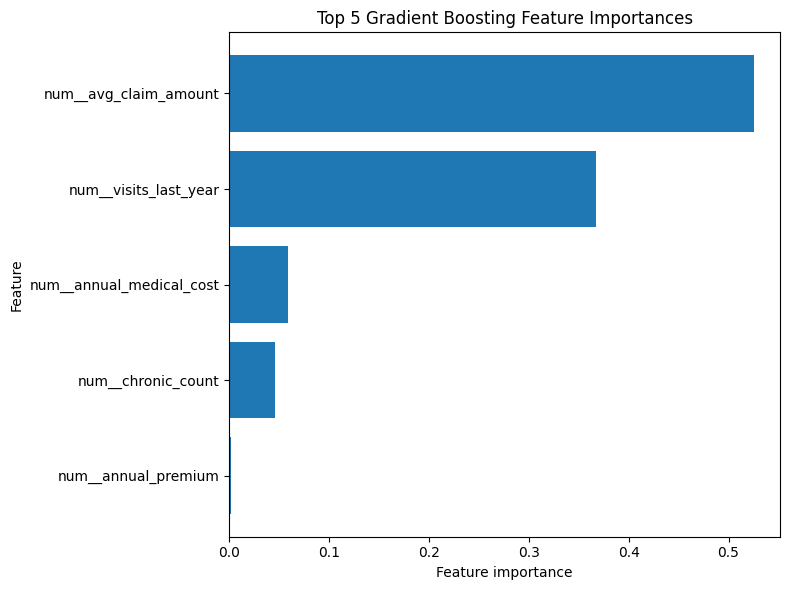

In [3]:
# 6) Barplot – Top N GBM features
top_n = 5
top_gbm = gbm_df.head(top_n)  # ya está ordenado de mayor a menor

plt.figure(figsize=(8, 6))
plt.barh(top_gbm["feature"][::-1], top_gbm["importance"][::-1])
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Gradient Boosting Feature Importances")
plt.tight_layout()
plt.show()
